In [10]:
%pip install lime

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import lime
import tensorflow as tf
import tensorflow.keras as keras

from skimage.segmentation import mark_boundaries
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from lime import lime_image

In [12]:
%matplotlib inline
%tensorflow_version 2.x

device_name = tf.test.gpu_device_name()

if device_name != "/device:GPU:0":
  raise SystemError("GPU device not found")

print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


In [13]:
baseModel = VGG16(input_shape=(224, 224, 3), weights="imagenet", include_top=False)

for layer in baseModel.layers:
  layer.trainable = False

headModel = baseModel.output
headModel = AveragePooling2D()(headModel)
headModel = Flatten()(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(3, activation='softmax')(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [15]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
data_path = "/content/drive/MyDrive/Research/Docker-v-Podman/data"

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(data_path + "/train",
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = "categorical",
                                                 shuffle=True)

test_set = test_datagen.flow_from_directory(data_path + "/test",
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = "categorical",
                                            shuffle = False)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [18]:
history = model.fit_generator(training_set,
                              validation_data=test_set,
                              epochs=10)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
322/322 [==============================] - 2982s 9s/step - loss: 0.3993 - accuracy: 0.8540 - val_loss: 0.2429 - val_accuracy: 0.9138
Epoch 2/10
322/322 [==============================] - 251s 778ms/step - loss: 0.2281 - accuracy: 0.9203 - val_loss: 0.2365 - val_accuracy: 0.8991
Epoch 3/10
322/322 [==============================] - 249s 775ms/step - loss: 0.2047 - accuracy: 0.9265 - val_loss: 0.2086 - val_accuracy: 0.9138
Epoch 4/10
322/322 [==============================] - 247s 767ms/step - loss: 0.1869 - accuracy: 0.9327 - val_loss: 0.2071 - val_accuracy: 0.9154
Epoch 5/10
322/322 [==============================] - 259s 804ms/step - loss: 0.1764 - accuracy: 0.9360 - val_loss: 0.1984 - val_accuracy: 0.9161
Epoch 6/10
322/322 [==============================] - 260s 808ms/step - loss: 0.1610 - accuracy: 0.9454 - val_loss: 0.2152 - val_accuracy: 0.9068
Epoch 7/10
322/322 [==============================] - 261s 811ms/step - loss: 0.1530 - accuracy: 0.9463 - val_loss: 0.1977 - v

In [19]:
model.save("model.h5")

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

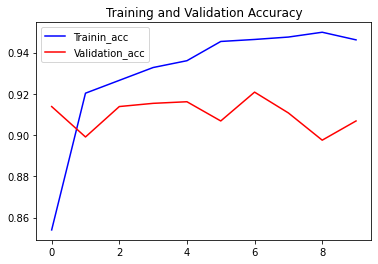

In [21]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

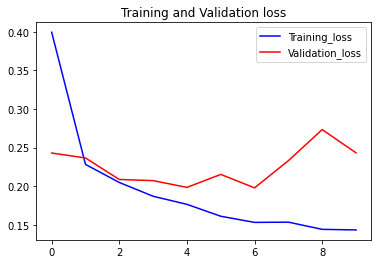

In [22]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")